In [1]:
from __future__ import division
from pylab import *
from scipy import optimize
import numpy as np
import pandas as pd

import Jesse_Funcs_New.JessePlot
import Jesse_Funcs_New.blahut as blahut
import Jesse_Funcs_New.helpers as helpers
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data_file = np.load('C_nonequal_optimized_new_PCM.npz')
test_mat = data_file['data'].item()['C_nonequal']
np.round(test_mat, 2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77],
       [ 1.  ,  1.66,  1.82,  1.88],
       [ 1.  ,  1.81,  1.9 ,  1.93]])

In [3]:
data_file = np.load('C_nonequal_optimized_new_PCM_more_states.npz')
test_mat_new = data_file['data'].item()['C_nonequal']
np.round(test_mat_new, 2)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.81],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.93],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.86],
       [ 1.  ,  1.56,  1.57,  1.93,  1.99]])

In [4]:
data_file = np.load('C_nonequal_test_intialize_32_states.npz')
new_states = data_file['data'].item()['C_nonequal']
np.round(new_states, 2)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.98],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [5]:
data_file = np.load('C_nonequal_test_intialize_64_states.npz')
new_states_64 = data_file['data'].item()['C_nonequal']
np.round(new_states_64, 4)

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.8295],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  2.0066],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  2.0234],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ]])

In [6]:
data_file = np.load('C_nonequal_test_intialize_64_states_8_write.npz')
new_states_64_8_write = data_file['data'].item()['C_nonequal']
np.round(new_states_64_8_write, 4)

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  2.0027],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ]])

In [7]:
combined_mat_idx = [test_mat>0.0]
test_mat_new[combined_mat_idx] = test_mat[combined_mat_idx]
test_mat_new[3][4]=new_states[3][4]
ys_new = np.round(test_mat_new, 3)
print (ys_new)

[[ 1.001  1.001  1.001  1.002  1.002]
 [ 1.002  1.555  1.698  1.765  1.813]
 [ 1.002  1.659  1.82   1.885  1.926]
 [ 1.002  1.809  1.901  1.93   1.979]
 [ 1.     1.558  1.566  1.926  1.985]]


/home/rzarcone/tensorflow/lib/python3.4/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  


In [8]:
combined_mat_idx = [test_mat>0.0]
new_states_64[combined_mat_idx] = test_mat[combined_mat_idx]
np.round(new_states_64,3)

/home/rzarcone/tensorflow/lib/python3.4/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 4
  


array([[ 1.001,  1.001,  1.001,  1.002,  0.   ,  0.   ],
       [ 1.002,  1.555,  1.698,  1.765,  0.   ,  1.83 ],
       [ 1.002,  1.659,  1.82 ,  1.885,  0.   ,  2.007],
       [ 1.002,  1.809,  1.901,  1.93 ,  0.   ,  2.023],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

In [9]:
new_states_64[:4,4] = ys_new[:4,4]
new_states_64[0,5] = 1.0
new_states_64[2,5] = new_states_64_8_write[2][5]
np.round(new_states_64,2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77,  1.81,  1.83],
       [ 1.  ,  1.66,  1.82,  1.88,  1.93,  2.  ],
       [ 1.  ,  1.81,  1.9 ,  1.93,  1.98,  2.02],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [10]:
final_states = dict(states = new_states_64 )
savez("final_states.npz", data=final_states)

In [11]:
data_file = np.load("final_states.npz")
new_states_64 = data_file['data'].item()['states']

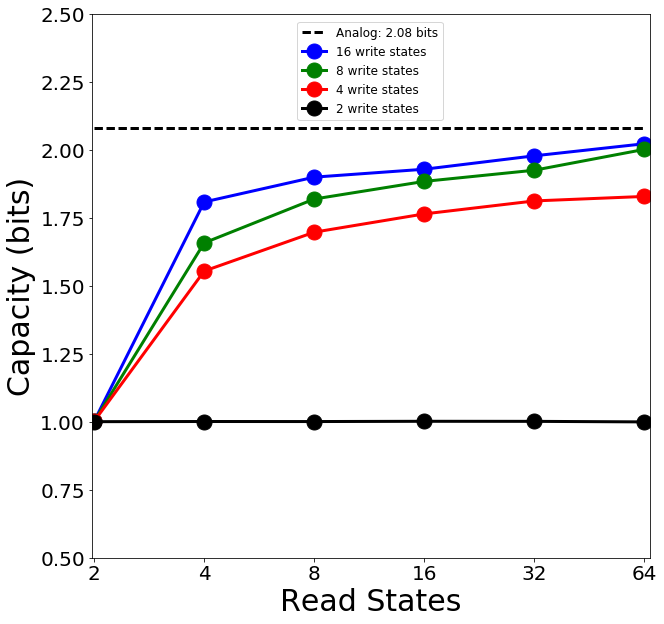

In [12]:
plt.figure(figsize=(10,10))
x_plot = np.array([4,3,2,1])
x = np.flip(x_plot, axis=0)
x = np.append(x,[5])
x = np.append(x,[6])
ys_new = new_states_64
colors = ['black', 'red','green','blue']
plt.plot(x, 2.08*np.ones_like(x), c='black' ,linestyle='--', lw=3)
for i in x_plot:
    plt.plot(x,ys_new[i-1,:], c=colors[i-1], marker='o', lw=3, ms=15)

read_states = [2,4,8,16,32,64]
plt.xticks(x, read_states, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(["Analog: 2.08 bits","16 write states", "8 write states", "4 write states", "2 write states"], 
           loc = (0.368,0.805), fontsize=12)
plt.xlabel("Read States", fontsize=30)
plt.ylabel("Capacity (bits)", fontsize=30)
plt.ylim(0.5,2.5)
plt.xlim(0.98,6.05)
plt.savefig("Plots/discrete_cap.png")